In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
iris = pd.read_csv('Iris.csv')
iris.drop(['Id'], axis = 1, inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
trainX, testX, trainY, testY = train_test_split(iris.drop(['Species'], axis =1), iris.Species, test_size= 0.25, 
                                                stratify = iris['Species'])

In [4]:
parameters_test = {
    'n_estimators':[5,10,20,40,100],
    'criterion':['gini', 'entropy'],
    #'max_features':[int, float, 'sqrt', 'log2', None],
    'max_depth':[None, 3, 4, 10]
}

In [5]:
classificator = RandomForestClassifier(n_jobs=-1)

In [6]:
grid = GridSearchCV(estimator= classificator, param_grid= parameters_test, scoring= 'accuracy', n_jobs=-1)

In [7]:
grid.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20, 40, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 4, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [8]:
print(pd.DataFrame(grid.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.110215  1.801691e-03         0.107673    1.546295e-03   
1        0.110894  1.981017e-03         0.111322    2.745291e-03   
2        0.114476  2.143500e-03         0.116755    1.417188e-03   
3        0.123611  3.672012e-03         0.108560    4.382148e-03   
4        0.129314  4.654335e-04         0.104633    3.715728e-06   
5        0.106984  1.005765e-03         0.102803    1.670028e-04   
6        0.109240  8.440281e-04         0.103194    4.873647e-04   
7        0.110185  4.034252e-04         0.110096    5.150804e-03   
8        0.115026  4.708648e-04         0.103421    8.084691e-04   
9        0.132186  1.629511e-03         0.115151    1.901795e-03   
10       0.106085  9.383711e-04         0.111121    4.791951e-04   
11       0.108071  9.409988e-04         0.111113    3.081136e-03   
12       0.114292  2.861053e-03         0.104648    1.403771e-06   
13       0.114651  2.964412e-05         0.112199

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [9]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 20}


In [10]:
classificator = RandomForestClassifier(criterion='gini', n_estimators=20, n_jobs=-1)

In [11]:
classificator.fit(trainX, trainY)
predict = classificator.predict(testX)

In [12]:
print(confusion_matrix(testY, predict))
print(classification_report(testY, predict))

[[13  0  0]
 [ 0 12  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.92      0.92      0.92        12

      micro avg       0.95      0.95      0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



<BarContainer object of 4 artists>

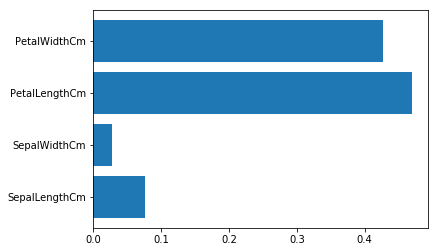

In [13]:
plt.barh(iris.columns[:-1], classificator.feature_importances_)

In [14]:
trainX, testX, trainY, testY = train_test_split(iris.drop(['Species', 'SepalWidthCm', 'SepalLengthCm'], axis =1), iris.Species, test_size= 0.25, 
                                                stratify = iris['Species'])

In [15]:
classificator = RandomForestClassifier(criterion='gini', n_estimators=20, n_jobs=-1)
classificator.fit(trainX, trainY)
predict = classificator.predict(testX)
print(confusion_matrix(testY, predict))
print(classification_report(testY, predict))

[[13  0  0]
 [ 0 11  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.93      1.00      0.96        13

      micro avg       0.97      0.97      0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [16]:
XC = iris.drop(['Species'], axis = 1) #X completo
XP = iris.drop(['SepalLengthCm', 'SepalWidthCm', 'Species'], axis=1) #X Parcial
Y = iris['Species']

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
RF = RandomForestClassifier(criterion='gini', n_estimators=20, n_jobs=-1)
score = cross_val_score(RF, XC, Y, cv=5)
print(score)

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [19]:
print('A acuracia da Iris com todos atributos tem:')
print('Média: %0.2f e Desvio Padrão de +/-: %0.2f' % (np.mean(score), np.std(score)))

A acuracia da Iris com todos atributos tem:
Média: 0.96 e Desvio Padrão de +/-: 0.02


In [20]:
RF = RandomForestClassifier(criterion='gini', n_estimators=20, n_jobs=-1)
score = cross_val_score(RF, XP, Y, cv=5)
print(score)

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [21]:
print('A acuracia da Iris só com atributo da Petalas tem:')
print('Média: %0.2f e Desvio Padrão de +/-: %0.2f' % (np.mean(score), np.std(score)))

A acuracia da Iris só com atributo da Petalas tem:
Média: 0.97 e Desvio Padrão de +/-: 0.02
